# Import Libs

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


# Read Data

In [96]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check for missing data

In [97]:
print(df.columns[df.isna().any().tolist()])
missing_values = df.isnull().sum()
print(missing_values)

Index([], dtype='object')
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


# Visualize Data

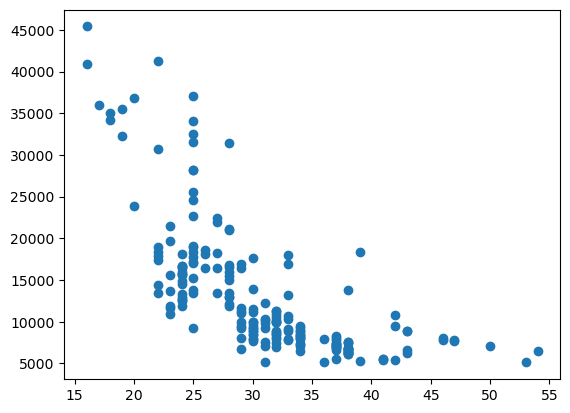

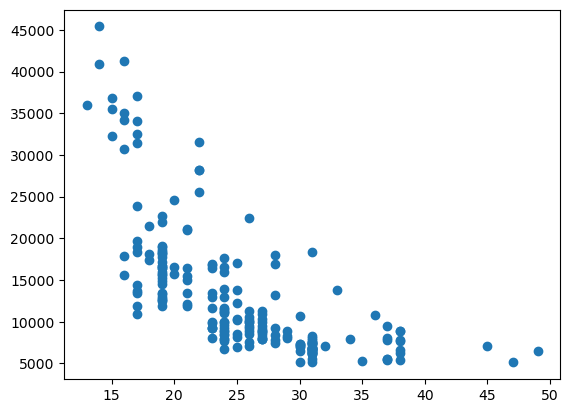

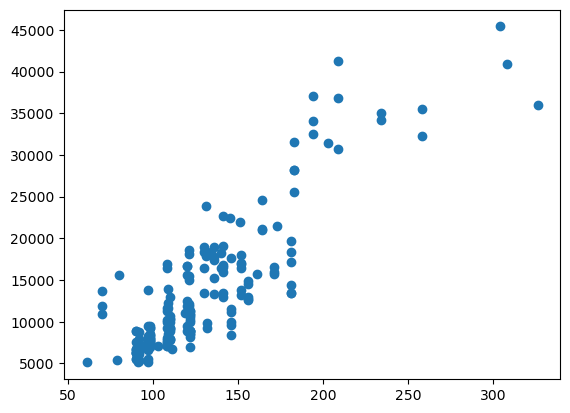

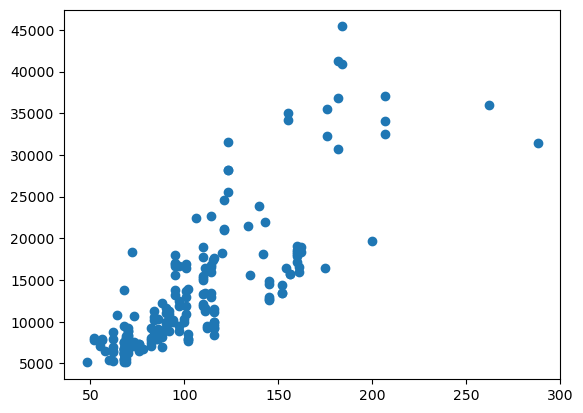

In [98]:
plt.scatter(df['highwaympg'],df['price'])
plt.show()
plt.scatter(df['citympg'],df['price'])
plt.show()
plt.scatter(df['enginesize'],df['price'])
plt.show()
plt.scatter(df['horsepower'],df['price'])
plt.show()

# Defining X and Y

In [99]:
y = df['price']
x = df.drop(['price','car_ID','CarName'],axis=1)

# Encoding

In [100]:
encoder = OneHotEncoder()

categorical_cols = ['symboling', 'fueltype',  'doornumber','aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem','cylindernumber']

x = pd.get_dummies(x, columns=categorical_cols)

print(x)
x.head()


     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  ...  fuelsystem_mpfi  \
0         3.47    2.68           

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,0,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,0,1,0,0,0,0,0


# Model Linear regression

In [101]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.3)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Evaluation

In [104]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean absolute Error: 1838.030935546776
Mean Squared Error: 8054168.607304341
R-squared: 0.8656466460190764


# Ridge Regression

In [105]:
lam = [0,0.001,1]

for l in lam:
    model_r = Ridge(alpha=0.5)
    model_r.fit(x_train, y_train)
    y_pred_r = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_r)
print("Mean absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred_r)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_r)
print("R-squared:", r2)


Mean absolute Error: 1838.030935546776
Mean Squared Error: 8054168.607304341
R-squared: 0.8656466460190764
